# Importar dependências instaladas no ambiente virtual

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Carregar dataset

In [3]:

# Load the dataset
data = pd.read_csv('./src/data.csv')

# Convert categorical variables to one-hot encoding
data = pd.get_dummies(data, columns=[
                      'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   avg_glucose_level               5110 non-null   float64
 5   bmi                             4909 non-null   float64
 6   stroke                          5110 non-null   int64  
 7   gender_Female                   5110 non-null   bool   
 8   gender_Male                     5110 non-null   bool   
 9   gender_Other                    5110 non-null   bool   
 10  ever_married_No                 5110 non-null   bool   
 11  ever_married_Yes                5110 non-null   bool   
 12  work_type_Govt_job              51

# Cálculo de assimetrua e curtose

In [4]:
# Calculate skewness and kurtosis for numerical variables
numerical_vars = ['age', 'avg_glucose_level', 'bmi']
skewness = data[numerical_vars].apply(skew)
kurtosis_value = data[numerical_vars].apply(kurtosis)

print("\nSkewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis_value)


Skewness:
age                 -0.137019
avg_glucose_level    1.571822
bmi                       NaN
dtype: float64

Kurtosis:
age                 -0.991215
avg_glucose_level    1.677661
bmi                       NaN
dtype: float64


# Criação da matriz de correlação

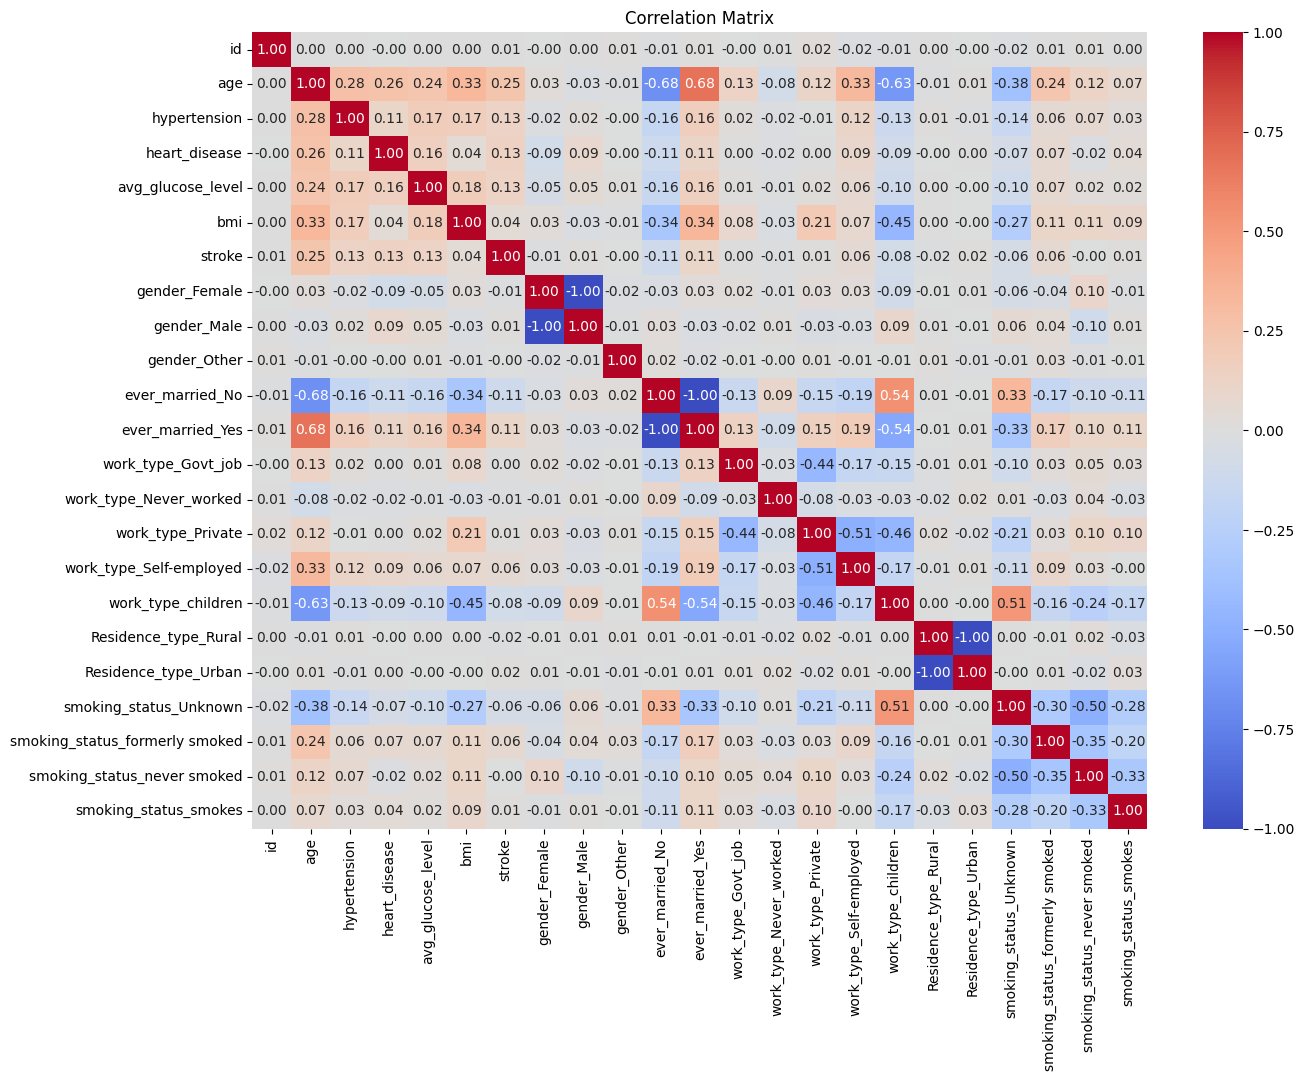

In [5]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout(pad=5)  # Adjust layout
plt.show()

# Análise de variáveis que mais se relacionam com a variável principal: infarto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   avg_glucose_level               5110 non-null   float64
 5   bmi                             4909 non-null   float64
 6   stroke                          5110 non-null   int64  
 7   gender_Female                   5110 non-null   bool   
 8   gender_Male                     5110 non-null   bool   
 9   gender_Other                    5110 non-null   bool   
 10  ever_married_No                 5110 non-null   bool   
 11  ever_married_Yes                5110 non-null   bool   
 12  work_type_Govt_job              51

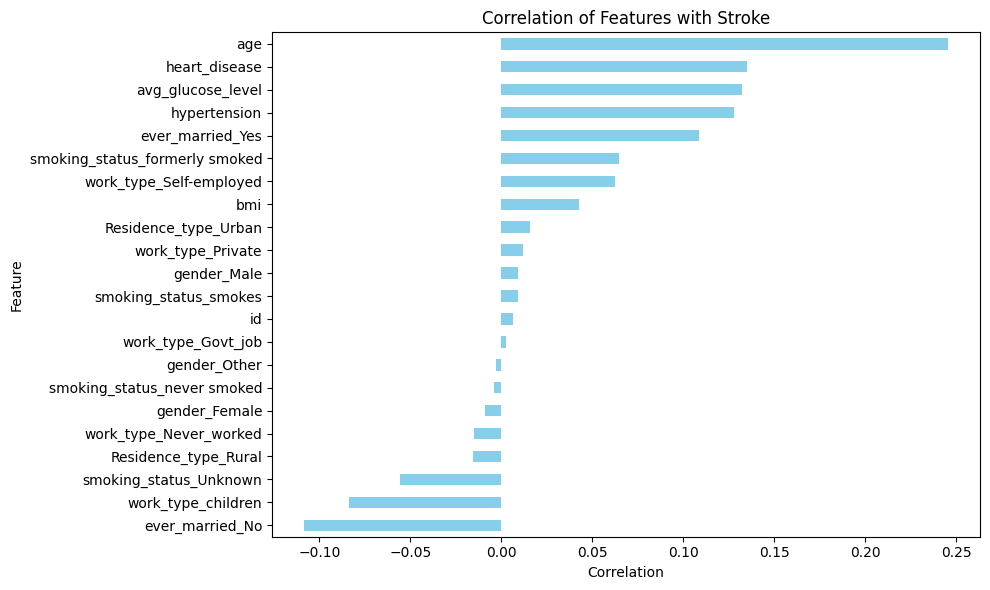

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv('./src/data.csv')

# Convert categorical variables to one-hot encoding
data = pd.get_dummies(data, columns=[
                      'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Display basic information about the dataset
print(data.info())

# Calculate skewness and kurtosis for numerical variables
numerical_vars = ['age', 'avg_glucose_level', 'bmi']
skewness = data[numerical_vars].apply(skew)
kurtosis_value = data[numerical_vars].apply(kurtosis)

print("\nSkewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis_value)

# Compute the correlation matrix
correlation_matrix = data.corr()

stroke_correlation = data.corr()['stroke'].drop(
    'stroke')  # Drop correlation of 'stroke' with itself

# Plot the correlations
plt.figure(figsize=(10, 6))
stroke_correlation.sort_values().plot(kind='barh', color='skyblue')
plt.title('Correlation of Features with Stroke')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.tight_layout()  # Adjust layout
plt.show()